In [1]:
import pandas as pd
import numpy as np
import lux
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\hackathon- halloween dataset\train.csv")
test = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\hackathon- halloween dataset\test.csv")
submission = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\hackathon- halloween dataset\sample_submission.csv")

In [3]:
train_c = train.copy()
test_c = test.copy()

In [4]:
train.head()

C:\Users\lenovo\anaconda3\lib\site-packages\lux\executor\PandasExecutor.py:462: UserWarning:
Lux detects that the attribute 'instock_date' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['instock_date'] = pd.to_datetime(df['instock_date'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If instock_date is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'instock_date':'quantitative'})
C:\Users\lenovo\anaconda3\lib\site-packages\lux\executor\PandasExecutor.py:462: UserWarning:
Lux detects that the attribute 'instock_date' may be temporal.
To display visuali

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
train.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [6]:
train.describe(include = 'all').T

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
train.duplicated().sum()

0

In [8]:
train.isna().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [9]:
train['Maximum_price'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [10]:
train.drop(columns = 'Customer_name', inplace = True)

In [11]:
train.dropna(subset = ['Selling_Price'], inplace = True)

In [12]:
train.reset_index(drop = True, inplace = True)

In [13]:
train.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 6327 entries, 0 to 6326
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6327 non-null   object 
 1   Stall_no          6322 non-null   float64
 2   instock_date      6327 non-null   object 
 3   Market_Category   6327 non-null   int64  
 4   Loyalty_customer  6327 non-null   object 
 5   Product_Category  6327 non-null   object 
 6   Grade             6327 non-null   int64  
 7   Demand            6327 non-null   int64  
 8   Discount_avail    6290 non-null   float64
 9   charges_1         6129 non-null   float64
 10  charges_2 (%)     6123 non-null   float64
 11  Minimum_price     6289 non-null   float64
 12  Maximum_price     5986 non-null   float64
 13  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 692.1+ KB


In [14]:
train.isna().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [15]:
train['Stall_no'].fillna(train['Stall_no'].mode()[0], inplace = True)

In [16]:
train['Discount_avail'].fillna(train['Discount_avail'].mode()[0], inplace = True)

In [17]:
train['charges_1'].fillna(train['charges_1'].mode()[0], inplace = True)

In [18]:
train['charges_2 (%)'].fillna(train['charges_2 (%)'].mode()[0], inplace = True)

In [19]:
train['Minimum_price'].fillna(train['Minimum_price'].mode()[1], inplace = True)

In [20]:
train['Maximum_price'].fillna(train['Maximum_price'].mode()[4], inplace = True)

In [21]:
train.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 6327 entries, 0 to 6326
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6327 non-null   object 
 1   Stall_no          6327 non-null   float64
 2   instock_date      6327 non-null   object 
 3   Market_Category   6327 non-null   int64  
 4   Loyalty_customer  6327 non-null   object 
 5   Product_Category  6327 non-null   object 
 6   Grade             6327 non-null   int64  
 7   Demand            6327 non-null   int64  
 8   Discount_avail    6327 non-null   float64
 9   charges_1         6327 non-null   float64
 10  charges_2 (%)     6327 non-null   float64
 11  Minimum_price     6327 non-null   float64
 12  Maximum_price     6327 non-null   float64
 13  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 692.1+ KB


In [22]:
train.describe().T

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [23]:
train['instock_date'] = pd.to_datetime(train['instock_date'])

In [24]:
#train['instock_year'] = train['instock_date'].dt.year

In [25]:
#train['instock_month'] = train['instock_date'].dt.month

In [26]:
#train['instock_day'] = train['instock_date'].dt.day

In [ ]:
# g = train.groupby(pd.Grouper(freq="M"))
# GB=train.groupby([train.index.year.values,train.index.month.values]).sum()
# GB=train.groupby([(train.index.year),(train.index.month)]).sum()

In [27]:
train.drop(columns = ['instock_date'], inplace = True)

In [28]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [29]:
train['Product_Category'] = encode.fit_transform(train['Product_Category'])

In [30]:
train['Loyalty_customer'] = encode.fit_transform(train['Loyalty_customer'])

In [31]:
train.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [32]:
train_num = train.select_dtypes(include = np.number)
train_num[0:2]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

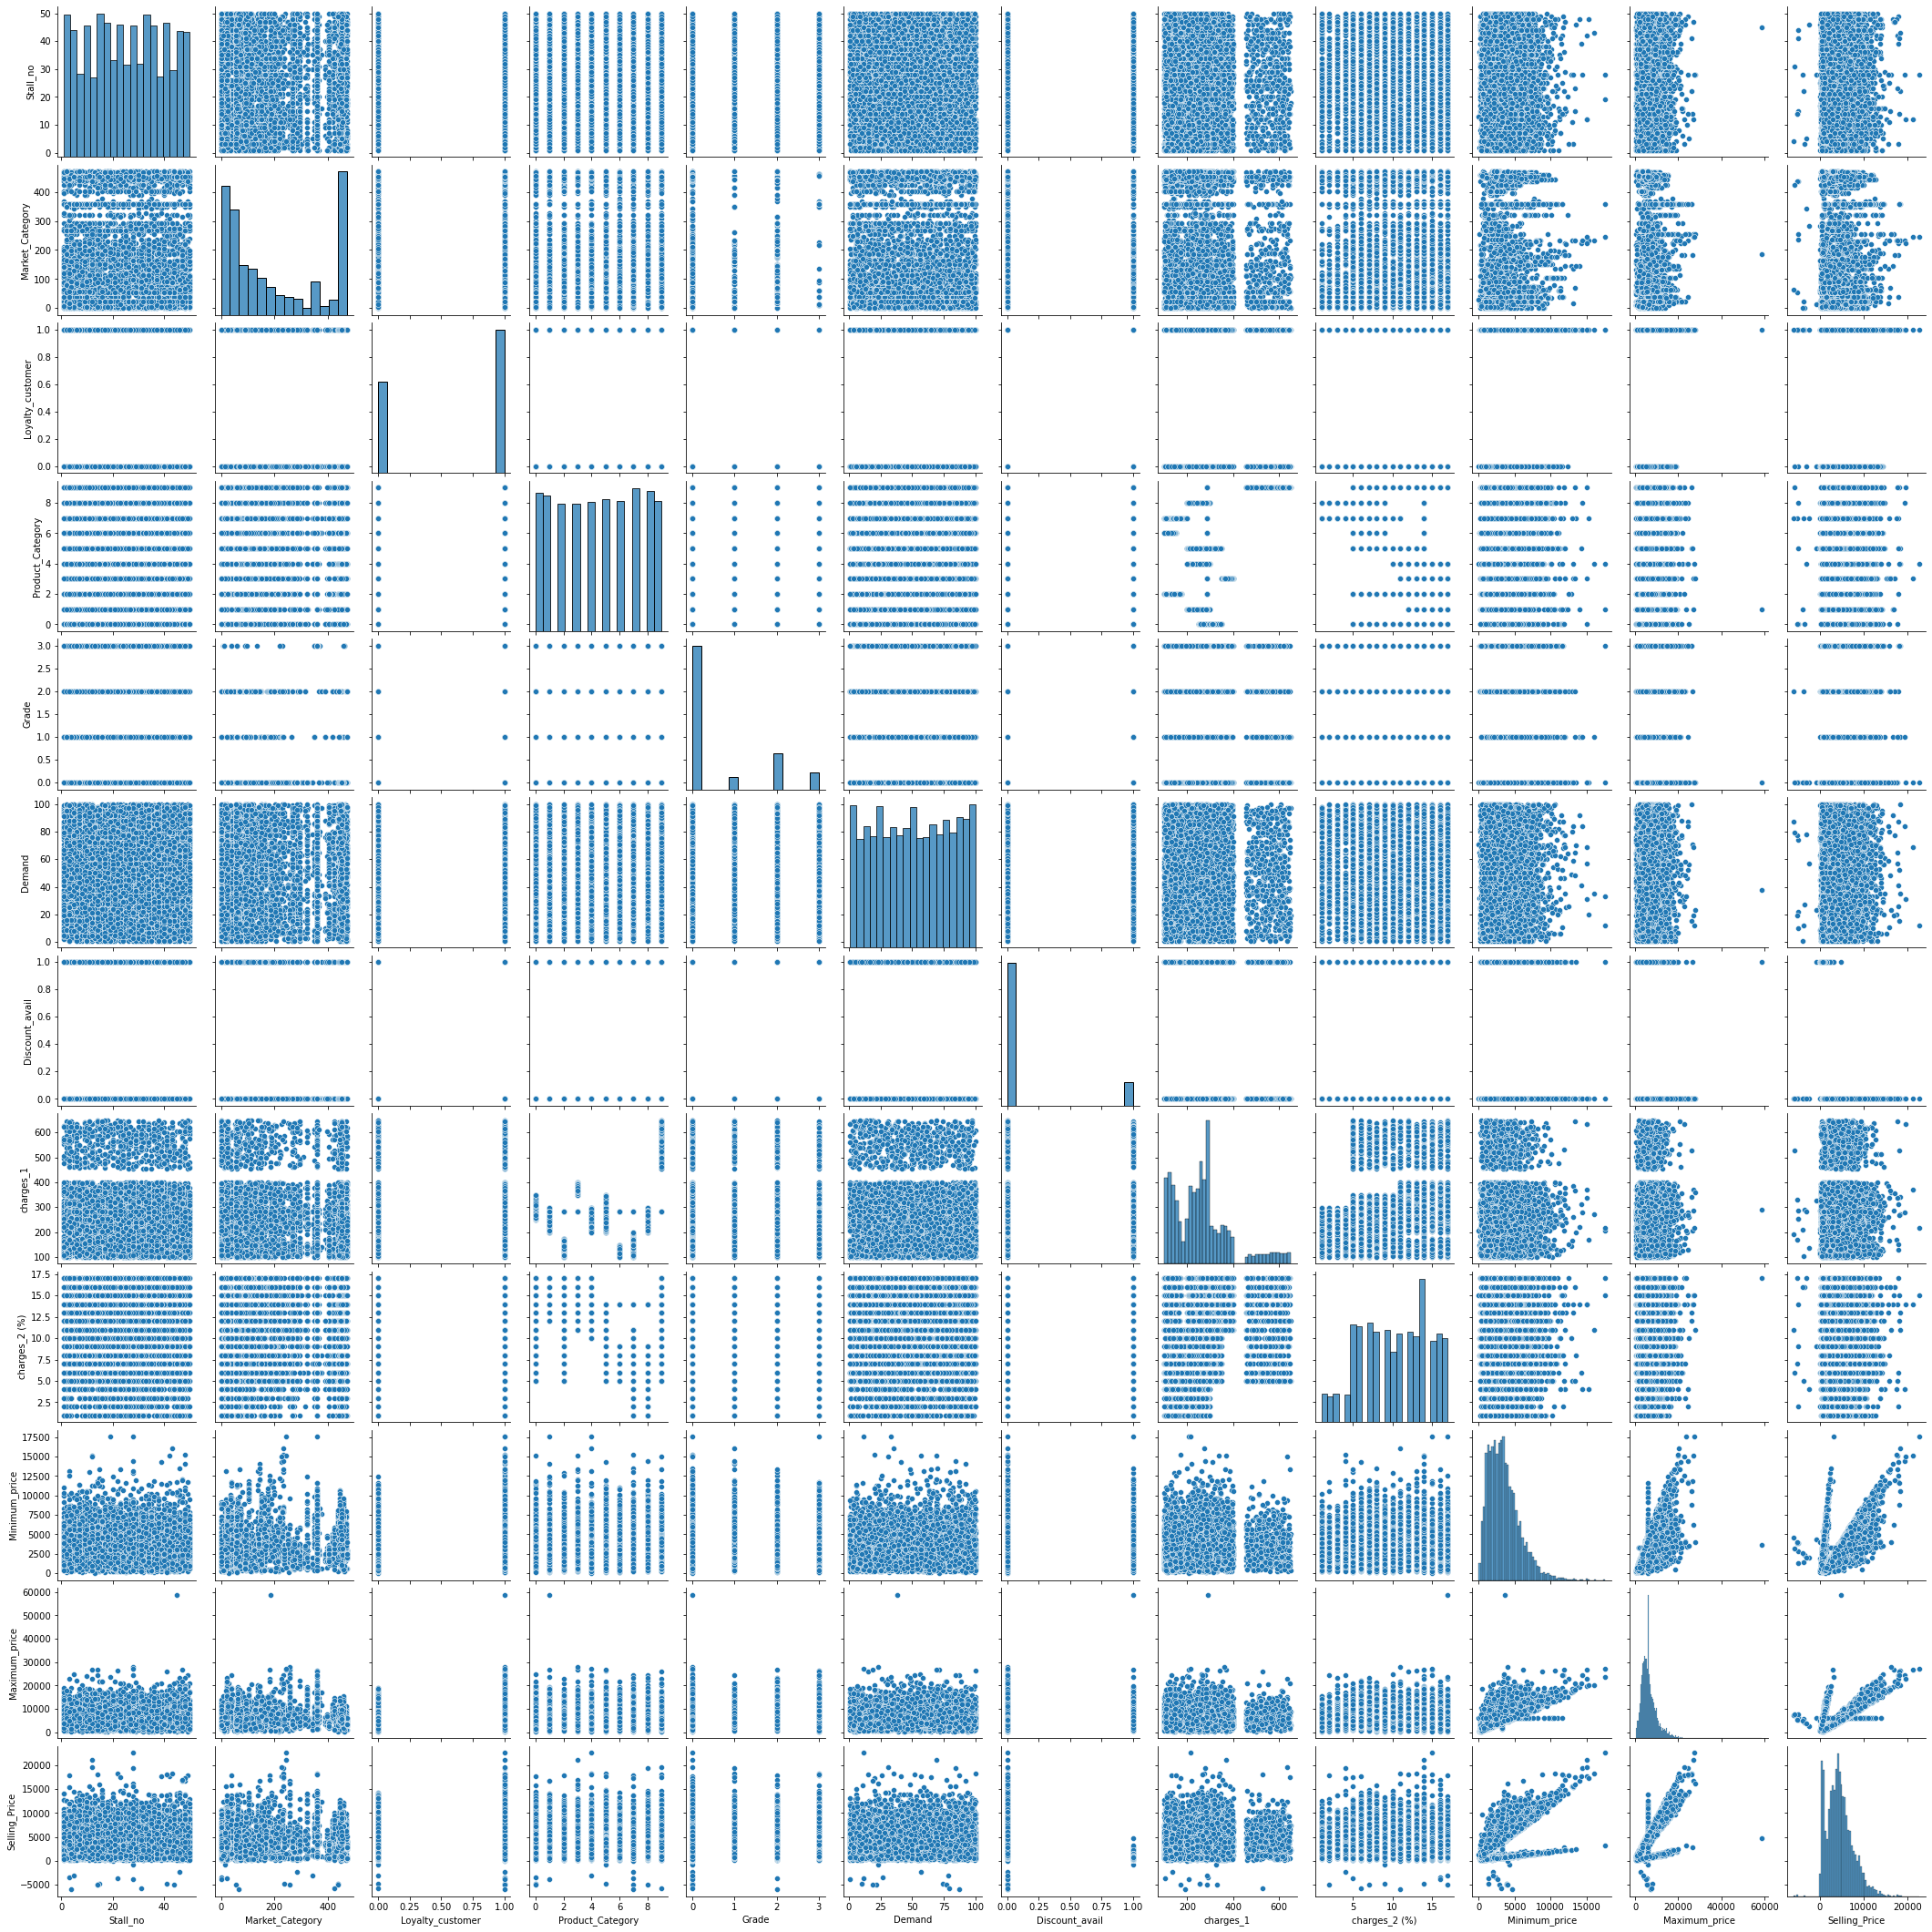

In [33]:
sns.pairplot(train)

In [34]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30,10)

<AxesSubplot:>

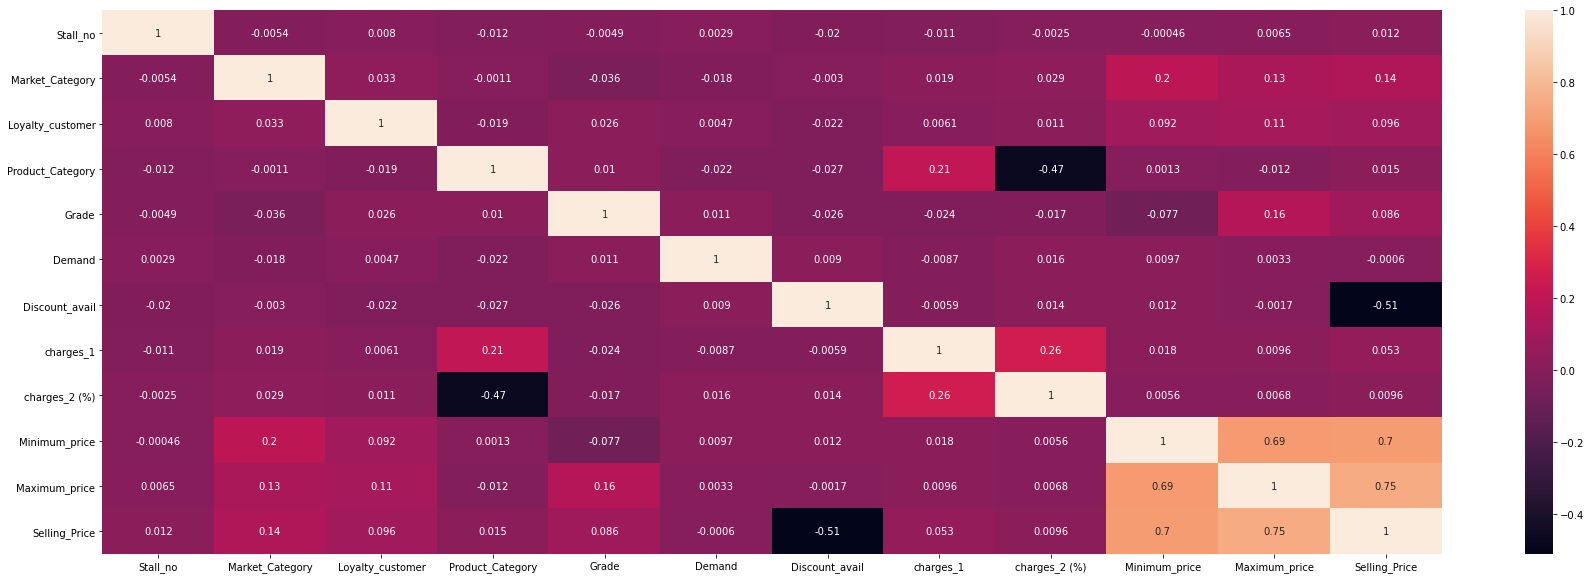

In [35]:
sns.heatmap(train_num.corr(), annot = True)

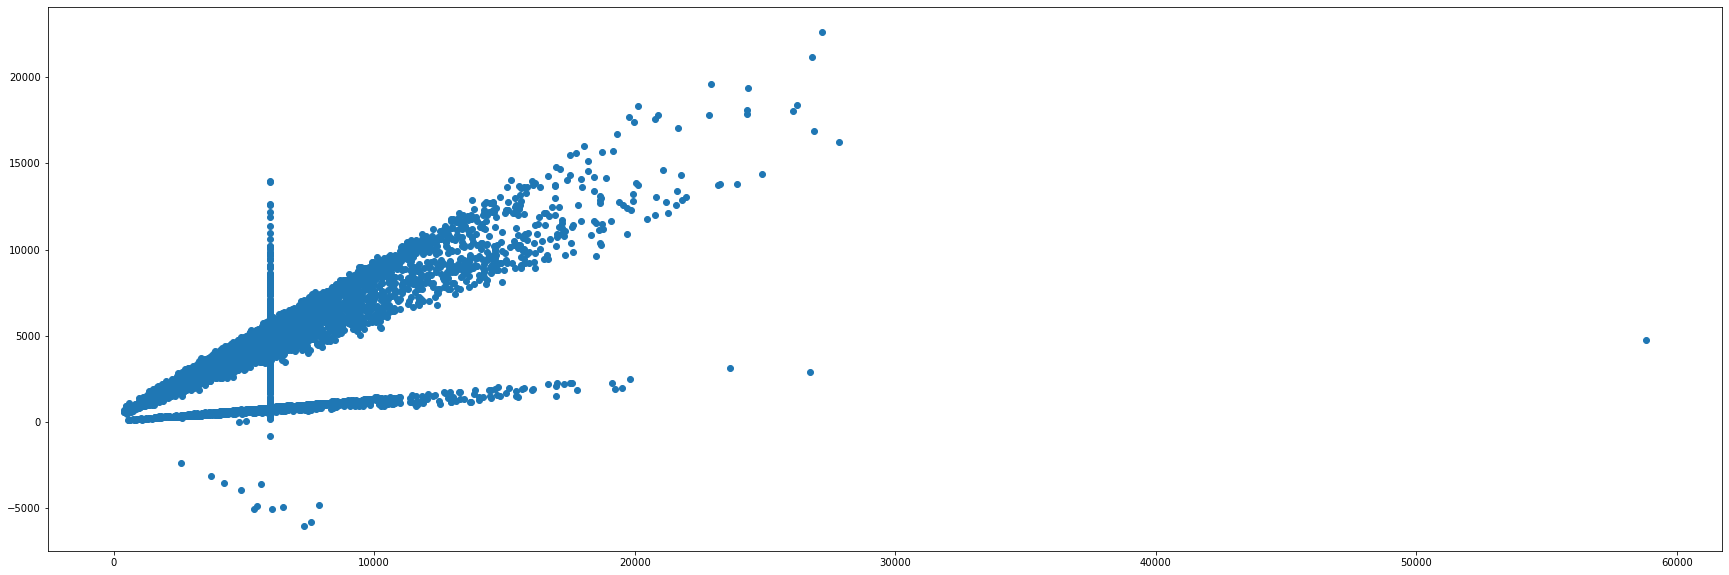

In [36]:
plt.scatter(train_num['Maximum_price'], train_num['Selling_Price'])

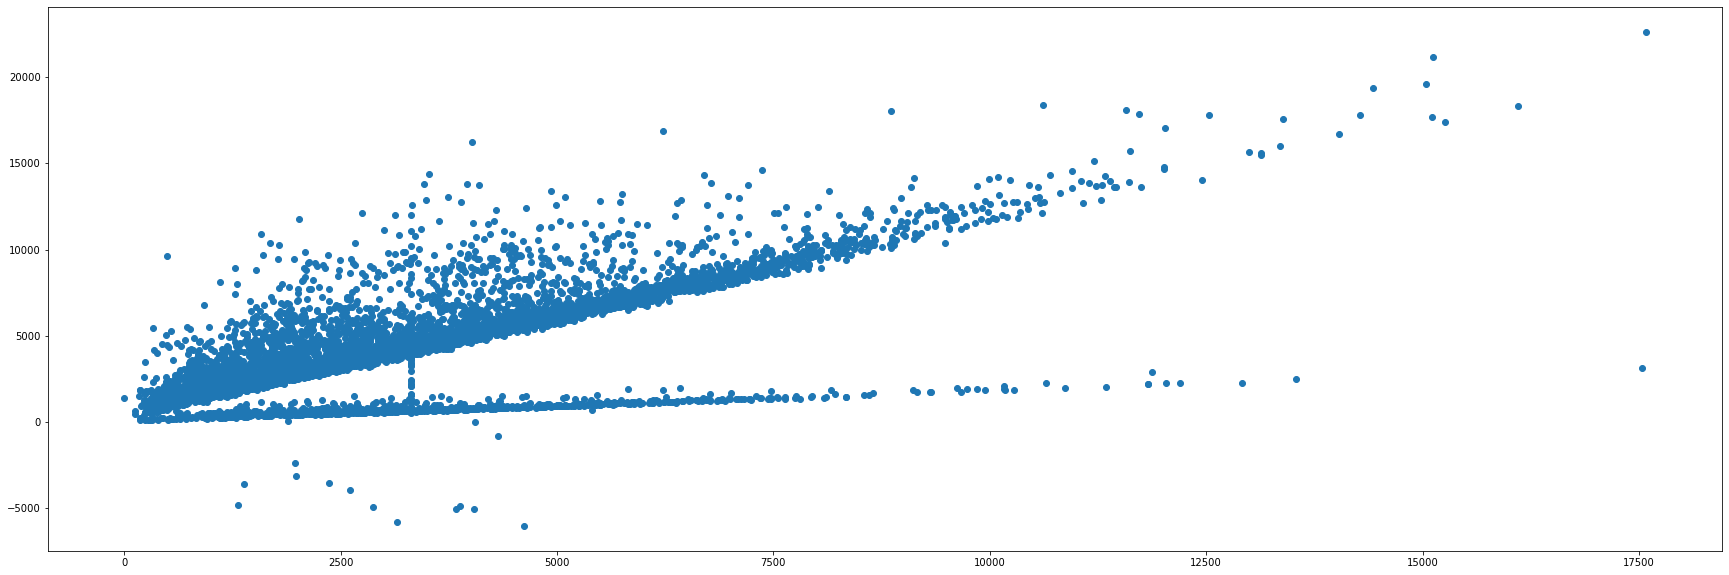

In [37]:
plt.scatter(train_num['Minimum_price'], train_num['Selling_Price'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Discount_avail', ylabel='count'>

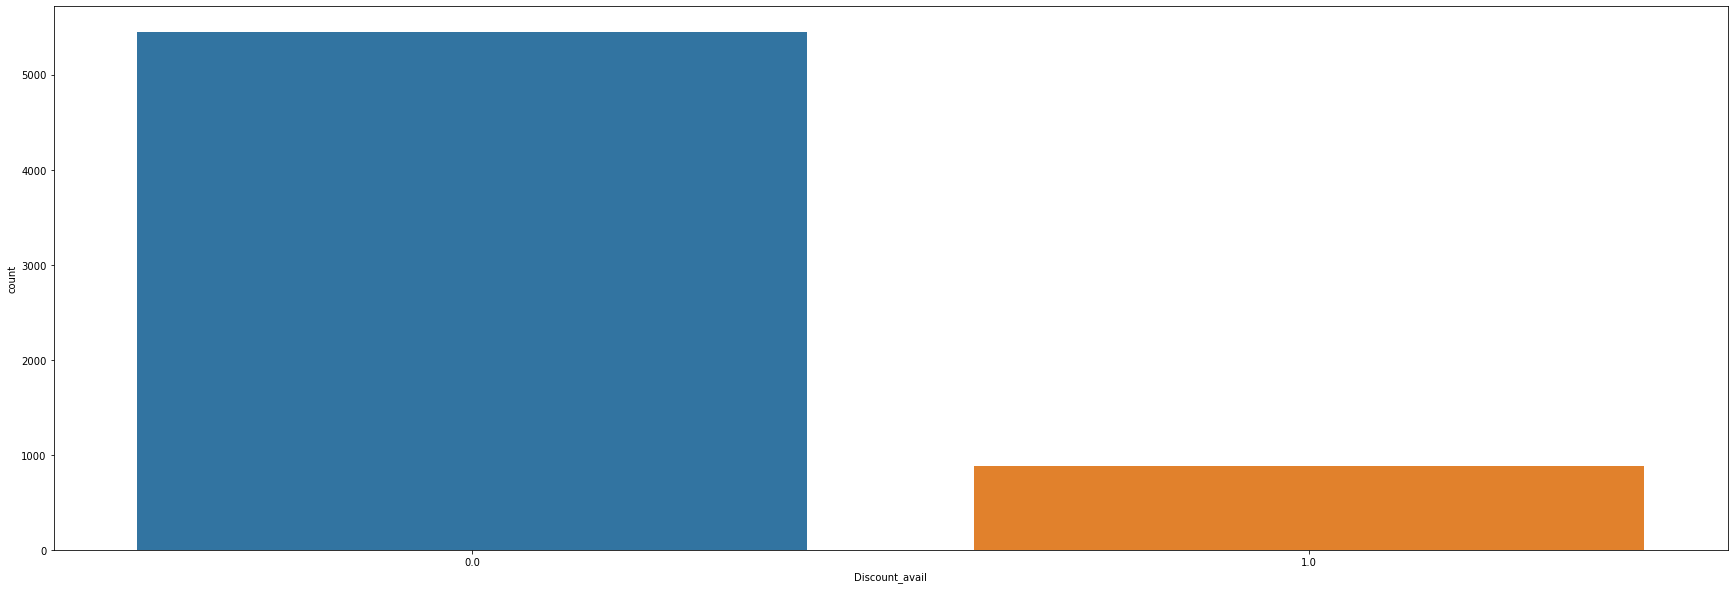

In [38]:
sns.countplot(train_num['Discount_avail'])

<BarContainer object of 6327 artists>

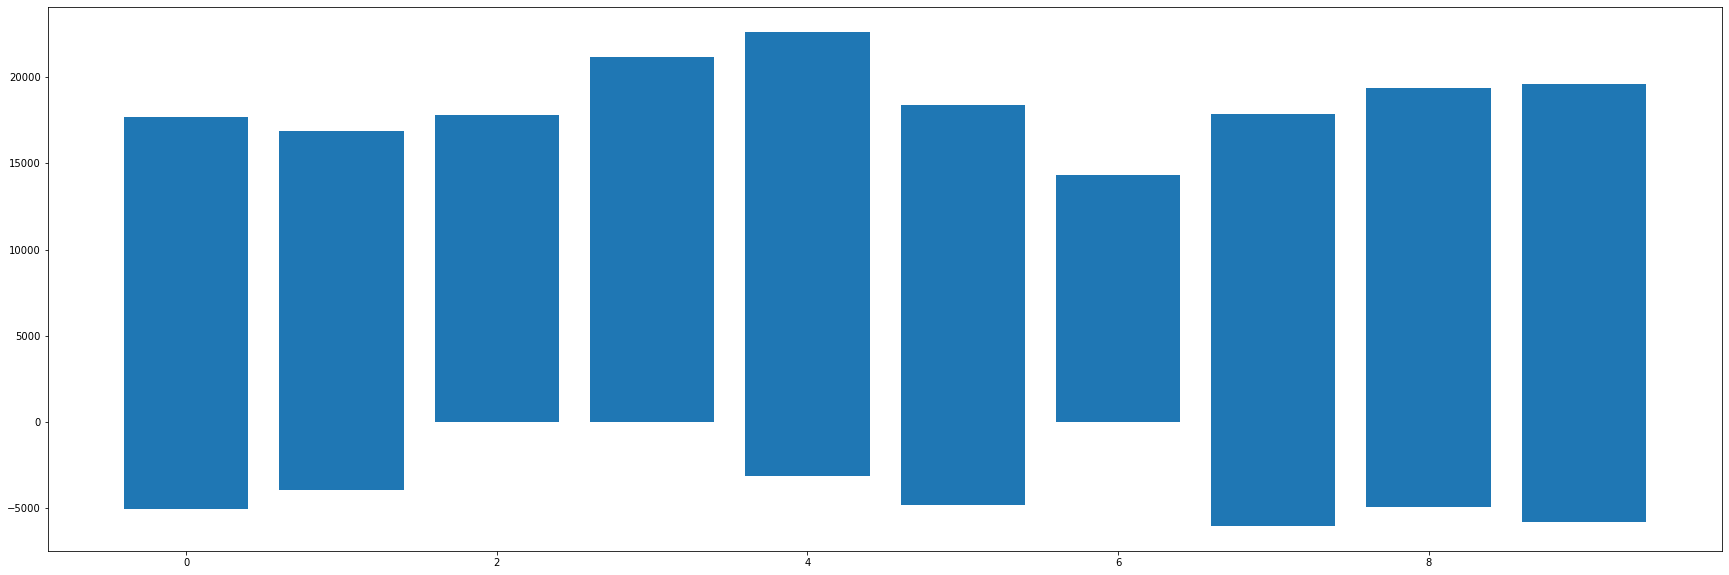

In [39]:
plt.bar(train_num['Product_Category'], train_num['Selling_Price'])

In [40]:
train_num_pre = train_num.drop(columns = ['Selling_Price'])

In [41]:
scale1 = StandardScaler()
train_pre = pd.DataFrame(scale1.fit_transform(train_num_pre), columns = train_num_pre.columns )

In [42]:
train_pre[0:2]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [43]:
x = train_pre
y = train['Selling_Price']

In [44]:
model1 = LinearRegression()
model1.fit(x,y)
y1 = model1.predict(x)

In [45]:
model2 = Ridge(random_state = 9)
model2.fit(x,y)
y2 = model2.predict(x)

In [46]:
model3 = Lasso(random_state = 9)
model3.fit(x,y)
y3 = model3.predict(x)

In [47]:
model4 = ElasticNet(l1_ratio = 0.9, random_state = 9)
model4.fit(x,y)
y4 = model4.predict(x)

In [48]:
model5 = KNeighborsRegressor(n_neighbors = 6)
model5.fit(x,y)
y5 = model5.predict(x)

In [49]:
def rmsle(y_pred, y_test) :
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test))**2))

In [50]:
rmsle(y1, y), rmsle(y2, y), rmsle(y3, y), rmsle(y4, y), rmsle(y5, y)

<ipython-input-49-4d0160355eb9>:3: RuntimeWarning:invalid value encountered in log1p
C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:invalid value encountered in log1p


(0.3404880044230834,
 0.33814054582393216,
 0.3318624849727007,
 0.34415575262027237,
 0.2072956062284064)

In [51]:
test.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3429 non-null   float64
 2   instock_date      3430 non-null   object 
 3   Market_Category   3430 non-null   int64  
 4   Customer_name     3377 non-null   object 
 5   Loyalty_customer  3430 non-null   object 
 6   Product_Category  3430 non-null   object 
 7   Grade             3430 non-null   int64  
 8   Demand            3430 non-null   int64  
 9   Discount_avail    3430 non-null   int64  
 10  charges_1         3394 non-null   float64
 11  charges_2 (%)     3425 non-null   float64
 12  Minimum_price     3416 non-null   float64
 13  Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 375.3+ KB


In [52]:
test.duplicated().sum()

0

In [53]:
test.isna().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [54]:
test.drop(columns = 'Customer_name', inplace = True)

In [55]:
test['Minimum_price'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [56]:
test['Stall_no'].fillna(test['Stall_no'].mode()[0], inplace = True)

In [57]:
test['charges_1'].fillna(test['charges_1'].mode()[0], inplace = True)

In [58]:
test['charges_2 (%)'].fillna(test['charges_2 (%)'].mode()[0], inplace = True)

In [59]:
test['Minimum_price'].fillna(test['Minimum_price'].mode()[0], inplace = True)

In [60]:
test['instock_date'] = pd.to_datetime(test['instock_date'])

In [61]:
#test['instock_year'] = test['instock_date'].dt.year

In [62]:
#test['instock_month'] = test['instock_date'].dt.month

In [63]:
#test['instock_day'] = test['instock_date'].dt.day

In [64]:
test.drop(columns = ['instock_date'], inplace = True)

In [65]:
test.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3430 non-null   float64
 2   Market_Category   3430 non-null   int64  
 3   Loyalty_customer  3430 non-null   object 
 4   Product_Category  3430 non-null   object 
 5   Grade             3430 non-null   int64  
 6   Demand            3430 non-null   int64  
 7   Discount_avail    3430 non-null   int64  
 8   charges_1         3430 non-null   float64
 9   charges_2 (%)     3430 non-null   float64
 10  Minimum_price     3430 non-null   float64
 11  Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 321.7+ KB


In [66]:
test['Product_Category'] = encode.fit_transform(test['Product_Category'])

In [67]:
test['Loyalty_customer'] = encode.fit_transform(test['Loyalty_customer'])

In [68]:
test_num = test.select_dtypes(include = np.number)
test_num[0:2]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [69]:
test_pre = pd.DataFrame(scale1.fit_transform(test_num), columns = test_num.columns )

In [70]:
Y1 = model1.predict(test_pre)

In [71]:
Y2 = model2.predict(test_pre)

In [72]:
Y3 = model3.predict(test_pre)

In [73]:
Y4 = model4.predict(test_pre)

In [74]:
Y5 = model5.predict(test_pre)

In [75]:
submission[0:2]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [76]:
sub = test_c
sub.head()

C:\Users\lenovo\anaconda3\lib\site-packages\lux\executor\PandasExecutor.py:462: UserWarning:
Lux detects that the attribute 'instock_date' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['instock_date'] = pd.to_datetime(df['instock_date'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If instock_date is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'instock_date':'quantitative'})
C:\Users\lenovo\anaconda3\lib\site-packages\lux\executor\PandasExecutor.py:462: UserWarning:
Lux detects that the attribute 'instock_date' may be temporal.
To display visuali

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [77]:
sub.drop(columns = ['Stall_no', 'instock_date', 'Market_Category', 'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)', 'Minimum_price', 'Maximum_price'], inplace = True)

In [78]:
sub['Selling_Price'] = 0.0

In [79]:
sub.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_id     3430 non-null   object 
 1   Selling_Price  3430 non-null   float64
dtypes: float64(1), object(1)
memory usage: 53.7+ KB


In [80]:
sub['Selling_Price'] = np.abs(Y1)
sub.to_csv("hhp1.csv", index = False)

In [81]:
sub['Selling_Price'] = np.abs(Y2)
sub.to_csv("hhp2.csv", index = False)

In [82]:
sub['Selling_Price'] = np.abs(Y3)
sub.to_csv("hhp3.csv", index = False)

In [83]:
sub['Selling_Price'] = np.abs(Y4)
sub.to_csv("hhp4.csv", index = False)

In [84]:
sub['Selling_Price'] = np.abs(Y5)
sub.to_csv("hhp5.csv", index = False)